In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import numpy as np   # import numerical python libraries for numerical functions

In [3]:
import pandas as pd    # pandas for structuring data into rows and columns and manipulate data

from sklearn.model_selection import train_test_split   # to create training, validation and testing data

In [4]:
from sklearn.neighbors import KNeighborsClassifier     # Algorithm to build model from

In [5]:
from scipy.stats import zscore   # for standardizing data on all columns

In [6]:
import seaborn as sns   # for plotting 

In [8]:
bc_df = pd.read_csv("/home/amol/GL/Residency3/supervisedML/wisc_bc_data.csv")    # read data into a dataframe

In [9]:
bc_df.shape

(569, 32)

In [10]:
bc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [11]:
bc_df['diagnosis'] = bc_df.diagnosis.astype('category')    # converting the diagnosis column type from object to numeric
bc_df.dtypes

id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [12]:
bc_df.describe().transpose()   # understand the story of the data


count          mean           std          min  \
id                 569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean        569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean       569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean     569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean          569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean    569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean   569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean     569.0  8.879932e-02  7.971981e-02     0.000000   
points_mean        569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean      569.0  1.811619e-01  2.741428e-02     0.106000   
dimension_mean     569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se          569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se         569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se       569.0  2.866059e+00  2.021855e+00     0.757000   
area_se            569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se      569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se     569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se       569.0  3.189372e-02  3.018606e-02     0.000000   
points_se          569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se        569.0  2.054230e-02  8.266372e-03     0.007882   
dimension_se       569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst       569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst      569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst    569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst         569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst   569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst  569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst    569.0  2.721885e-01  2.086243e-01     0.000000   
points_worst       569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst     569.0  2.900756e-01  6.186747e-02     0.156500   
dimension_worst    569.0  8.394582e-02  1.806127e-02     0.055040   

                             25%            50%           75%           max  
id                 869218.000000  906024.000000  8.813129e+06  9.113205e+08  
radius_mean            11.700000      13.370000  1.578000e+01  2.811000e+01  
texture_mean           16.170000      18.840000  2.180000e+01  3.928000e+01  
perimeter_mean         75.170000      86.240000  1.041000e+02  1.885000e+02  
area_mean             420.300000     551.100000  7.827000e+02  2.501000e+03  
smoothness_mean         0.086370       0.095870  1.053000e-01  1.634000e-01  
compactness_mean        0.064920       0.092630  1.304000e-01  3.454000e-01  
concavity_mean          0.029560       0.061540  1.307000e-01  4.268000e-01  
points_mean             0.020310       0.033500  7.400000e-02  2.012000e-01  
symmetry_mean           0.161900       0.179200  1.957000e-01  3.040000e-01  
dimension_mean          0.057700       0.061540  6.612000e-02  9.744000e-02  
radius_se               0.232400       0.324200  4.789000e-01  2.873000e+00  
texture_se              0.833900       1.108000  1.474000e+00  4.885000e+00  
perimeter_se            1.606000       2.287000  3.357000e+00  2.198000e+01  
area_se                17.850000      24.530000  4.519000e+01  5.422000e+02  
smoothness_se           0.005169       0.006380  8.146000e-03  3.113000e-02  
compactness_se          0.013080       0.020450  3.245000e-02  1.354000e-01  
concavity_se            0.015090       0.025890  4.205000e-02  3.960000e-01  
points_se               0.007638       0.010930  1.471000e-02  5.279000e-02  
symmetry_se             0.015160       0.018730  2.348000e-02  7.895000e-02  
dimension_se            0.002248       0.003187  4.558000e-03  2.984000e-02  
radius_worst           13.010000      14.970000  1.879000e+01  3.604000e+01  
texture_worst   

In [13]:
bc_df.groupby(["diagnosis"]).count()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
B          357          357           357             357        357   
M          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  points_mean  \
diagnosis                                                                   
B                      357               357             357          357   
M                      212               212             212          212   

           symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
diagnosis                 ...                                                 
B                    357  ...           357            357              357   
M                    212  ...           212            212              212   

           area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                     
B                 357               357                357              357   
M                 212               212                212              212   

           points_worst  symmetry_worst  dimension_worst  
diagnosis                                                 
B                   357             357              357  
M                   212             212              212  

[2 rows x 31 columns]

drop the first column from the data frame. This is Id column which is not used in modeling

In [14]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_df = bc_df.drop(labels = "id", axis = 1)


In [15]:
bc_df.shape

(569, 31)

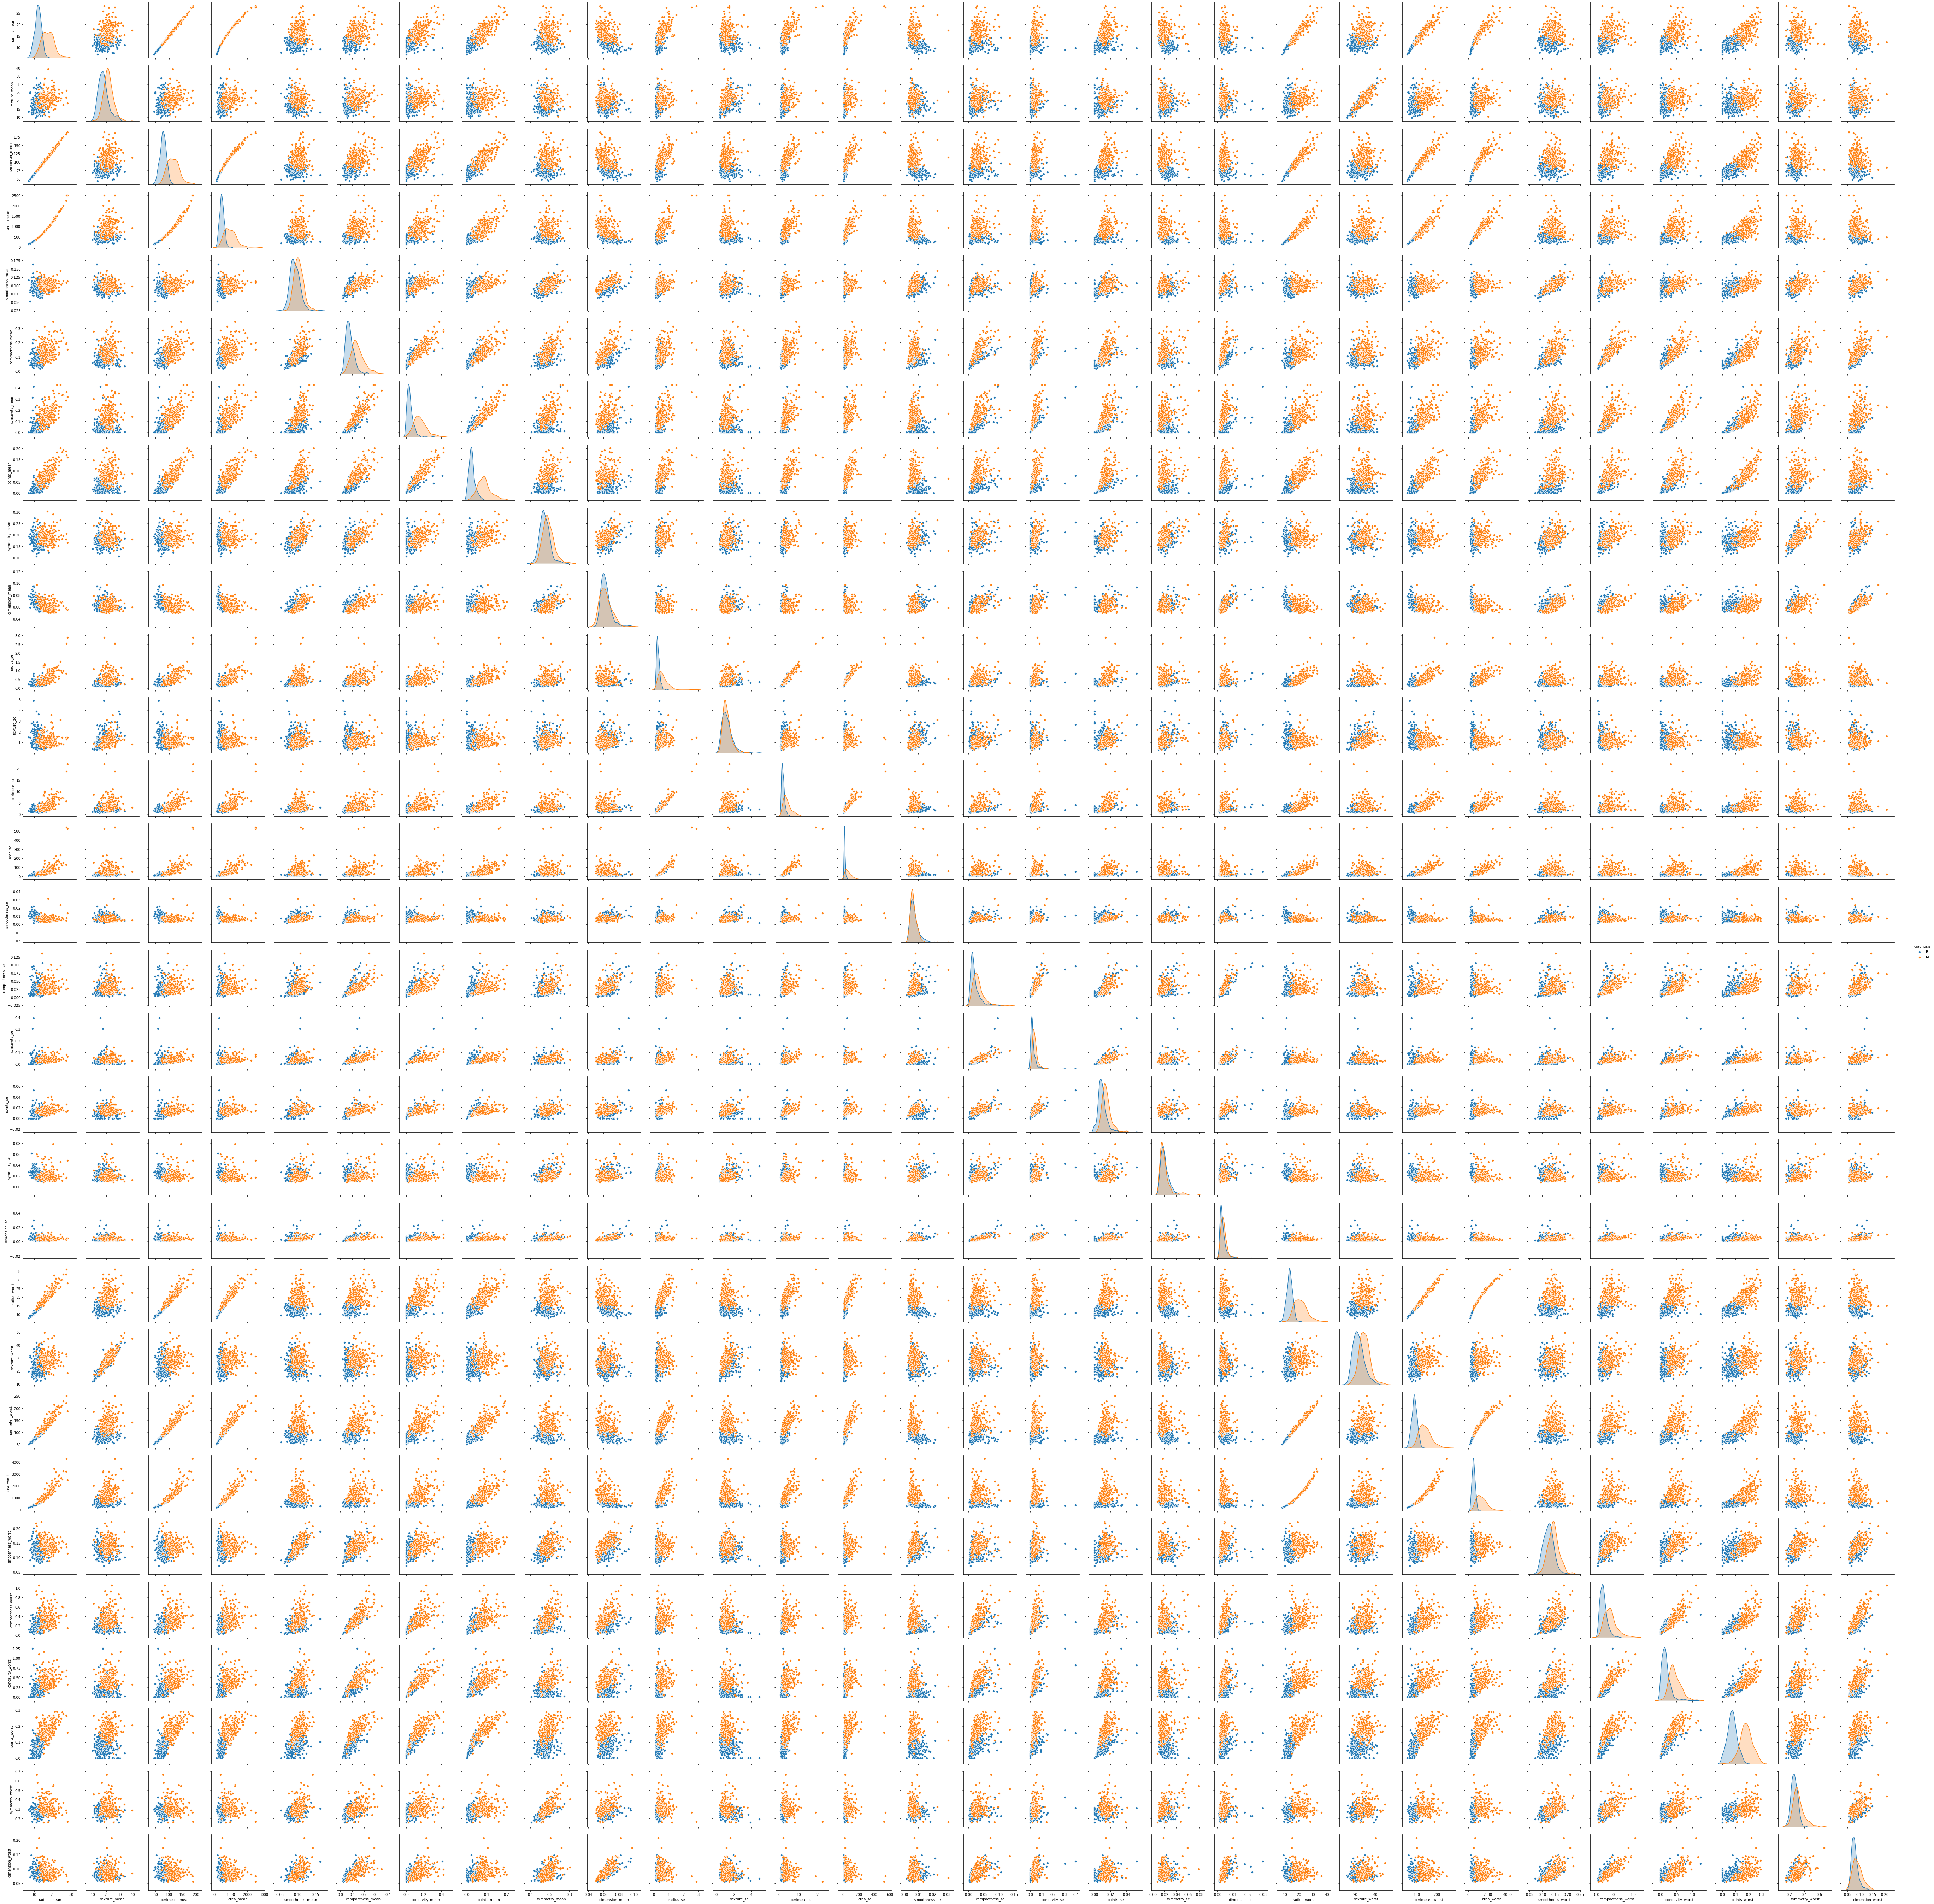

In [87]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix

sns.pairplot(bc_df , hue = "diagnosis" )

In [16]:
# Create a separate dataframe consisting only of the features i.e independent attributes

bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)   # all independent features extracted into a dataframe
bc_labels = bc_df['diagnosis']   # the target column is stored in a separate array

X =  np.array(bc_feature_df)   # convert both features and target to numpy array. Convention X is caps and y is small form
y = np.array(bc_labels)

print(X.shape)
print(y.shape)


(569, 30)
(569,)


In [17]:
# Split X and y into training validation and testing data set



X_trainval, X_test, y_trainval, y_test = train_test_split(X,y , test_size=0.20, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.30, random_state=1)

In [18]:
print("X_train size" , X_train.shape)
print("y_train size" , y_train.shape)
print()
print("X_val size" , X_val.shape)
print("y_val size" , y_val.shape)
print()
print("X_test size" , X_test.shape)
print("y_test size" , y_test.shape)

X_train size (318, 30)
y_train size (318,)

X_val size (137, 30)
y_val size (137,)

X_test size (114, 30)
y_test size (114,)


In [19]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

X_train_z = zscore(X_train)  

X_val_z = zscore(X_val)

X_test_z = zscore(X_test)


In [72]:

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )   # Instantiating the model 


In [73]:
# create the model

NNH.fit(X_train_z, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [75]:
# use the validation data to assess the accuracy of the model overall and class level

predicted_val_labels = NNH.predict(X_val_z)
NNH.score(X_val_z, y_val)


0.9635036496350365

In [76]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_val, predicted_val_labels))

[[84  1]
 [ 4 48]]


In [77]:
# To improve performance ------------------------- Iteration 2 -----------------------------------


In [78]:
# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [79]:
# To to drop dependent columns from bc_df

bc_features_pruned_df =  bc_feature_df.drop(['perimeter_mean'], axis=1)
bc_features_pruned_df =  bc_feature_df.drop(['area_mean'], axis=1)
bc_features_pruned_df =  bc_feature_df.drop(['perimeter_worst'], axis=1)
bc_features_pruned_df =  bc_feature_df.drop(['area_worst'], axis=1)

In [80]:
X =  np.array(bc_features_pruned_df)
y = np.array(bc_labels)


X_trainval, X_test, y_trainval, y_test = train_test_split(X,y , test_size=0.20, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.30, random_state=1)





In [81]:
X_train_z = zscore(X_train)  # convert all attributes to Z scale 

X_val_z = zscore(X_val)

X_test_z = zscore(X_test)

In [82]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train_z, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [83]:


predicted_val_labels = NNH.predict(X_val_z)
NNH.score(X_val_z, y_val)


0.9635036496350365

In [84]:
print(metrics.confusion_matrix(y_val, predicted_val_labels))

[[84  1]
 [ 4 48]]


In [29]:
# -------------------------------------------- Iteration 3 -------------------------------------------

In [85]:
# change the K value and check against pruned data

NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )   # Instantiating the model 

In [86]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train_z, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [87]:
predicted_val_labels = NNH.predict(X_val_z)
NNH.score(X_val_z, y_val)


0.9781021897810219

In [88]:
print(metrics.confusion_matrix(y_val, predicted_val_labels))

[[85  0]
 [ 3 49]]


# Finding the optimal K

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_z, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 5


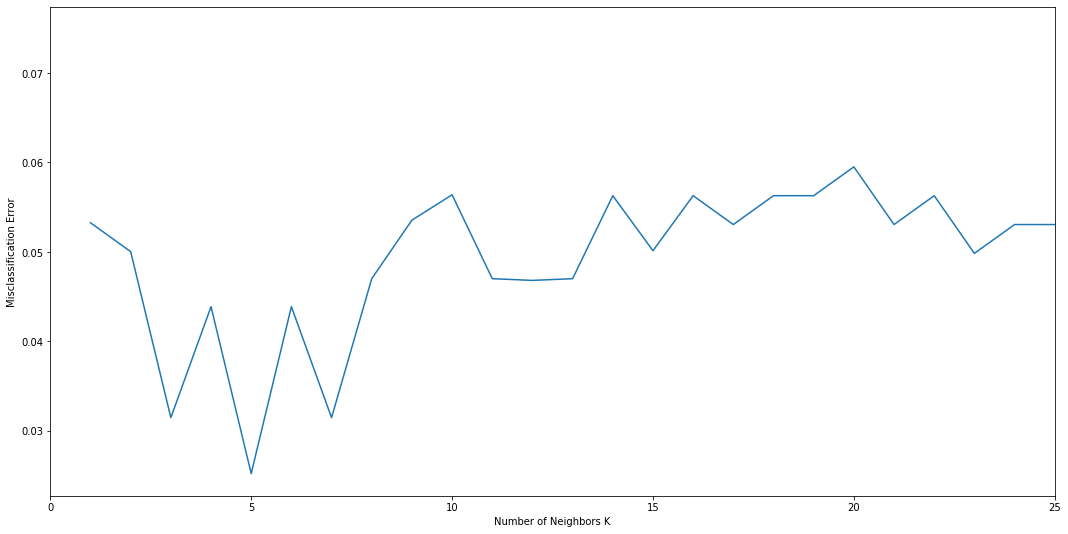

In [90]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()